# Multi-Linear Regression - Predict Computer Price

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
comp_data = pd.read_csv("Computer_Data.csv")

In [83]:
comp_data = comp_data.iloc[:,1:]

In [84]:
# creating dummy variables for yes and no values
comp_data['cd'] = comp_data.cd.map(dict(yes=1,no=0))
comp_data['multi'] = comp_data.multi.map(dict(yes=1,no=0))
comp_data['premium'] = comp_data.premium.map(dict(yes=1,no=0))

In [85]:
comp_data.corr()

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.197343,-0.016651,-0.080696,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,0.258260,0.084172,0.114208,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,0.503570,0.092805,0.196924,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,0.438504,0.045497,0.197145,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,0.129488,-0.001740,0.018745,-0.093919,0.188614
cd,0.197343,0.258260,0.503570,0.438504,0.129488,1.000000,0.432179,0.216077,-0.061091,0.445780
multi,-0.016651,0.084172,0.092805,0.045497,-0.001740,0.432179,1.000000,0.124775,-0.030394,0.210907
premium,-0.080696,0.114208,0.196924,0.197145,0.018745,0.216077,0.124775,1.000000,-0.152023,0.042107
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,-0.061091,-0.030394,-0.152023,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,0.445780,0.210907,0.042107,-0.318553,1.000000


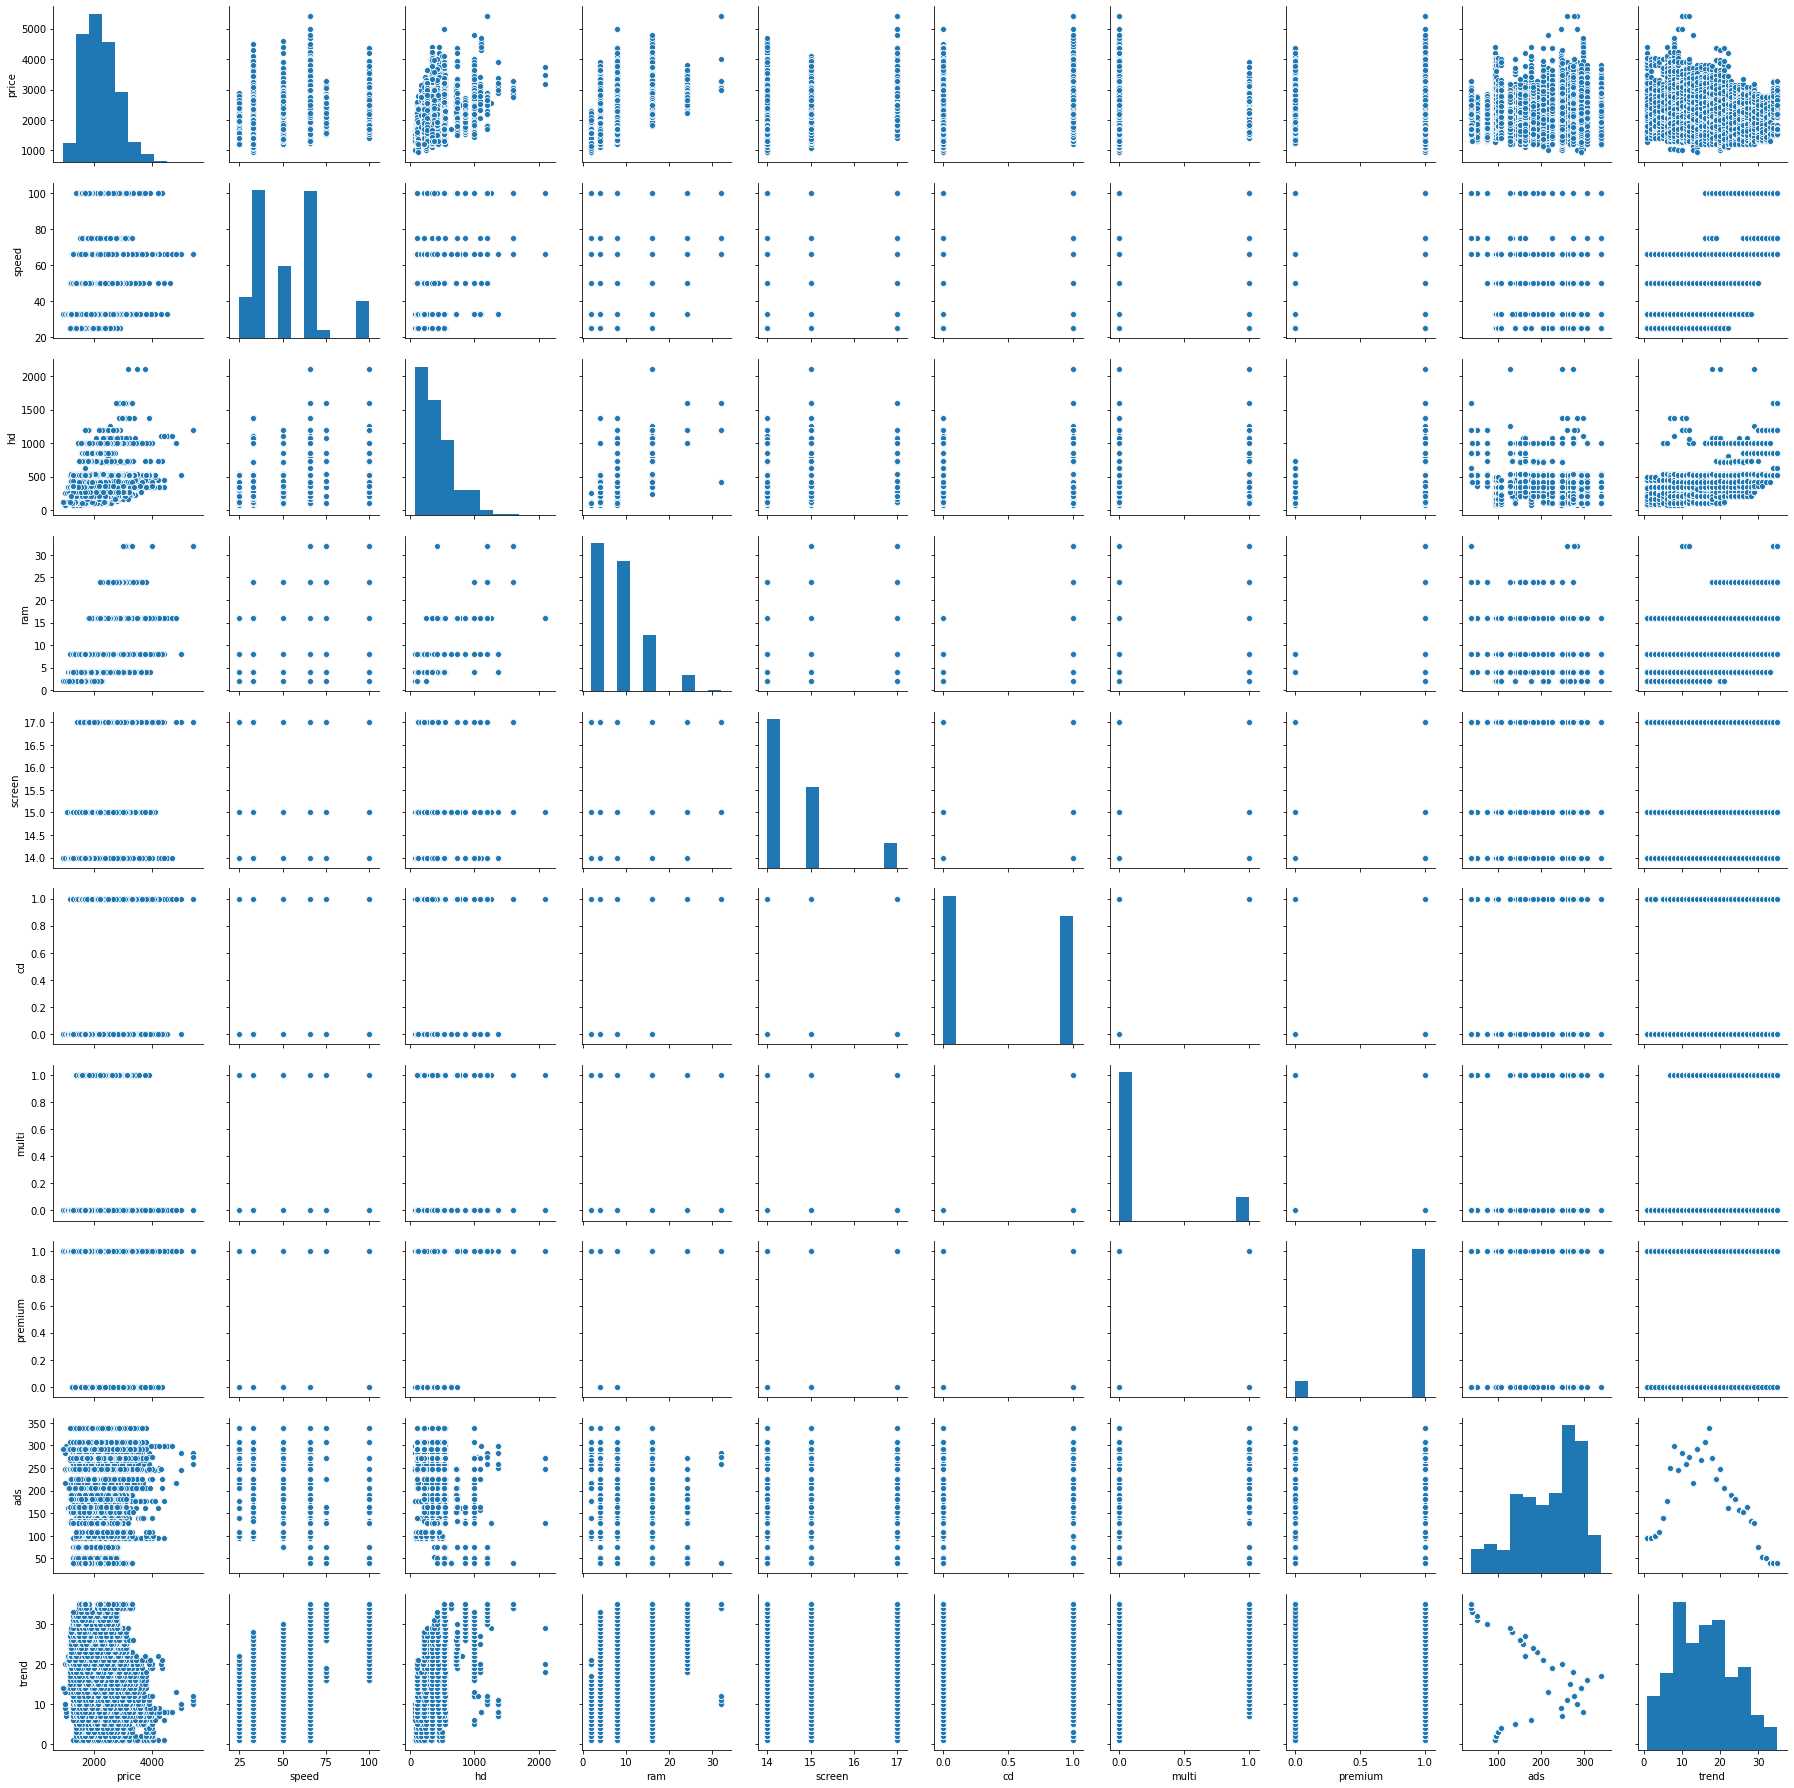

In [86]:
# Scatter plot between the variables along with histograms
import seaborn as sns
sns.pairplot(comp_data)

In [87]:
X = comp_data.drop(['price'],axis=1)
Y = comp_data.price

In [88]:
# linear model with all variables
import statsmodels.api as sm
Xc = sm.add_constant(X)
MLR_all = sm.OLS(Y,Xc).fit()
MLR_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     2399.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:28:10   Log-Likelihood:                -44039.
No. Observations:                6259   AIC:                         8.810e+04
Df Residuals:                    6249   BIC:                         8.817e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        307.9880     60.353      5.103      0.000     189.675     426.301
speed          9.3203      0.185     50.364      0.000       8.958       9.683
hd             0.7818      0.028     28.311      0.000       0.728       0.836
ram           48.2560      1.066     45.265      0.000      46.166      50.346
screen       123.0890      3.999     30.776      0.000     115.249     130.929
cd            60.9167      9.516      6.402      0.000      42.263      79.571
multi        104.3238     11.413      9.141      0.000      81.951     126.697
premium     -509.2247     12.342    -41.259      0.000    -533.420    -485.030
ads            0.6573      0.051     12.809      0.000       0.557       0.758
trend        -51.8496      0.629    -82.470      0.000     -53.082     -50.617
==============================================================================
Omnibus:                     1014.821   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.887
Skew:                           0.832   Prob(JB):                         0.00
Kurtosis:                       6.077   Cond. No.                     9.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# droping few variable
Xc = Xc.drop(['cd','multi','premium','ads','trend'],axis=1)

In [90]:
# creating new model with only Speed,hd,ram,screen variables
MLM_model1 = sm.OLS(Y,Xc).fit()
MLM_model1.rsquared

0.458642660940051

In [91]:
Xc = X.drop(['cd','multi','premium','ads'],axis=1)
Xc = sm.add_constant(Xc)
MLM_model2 = sm.OLS(Y,Xc).fit()
MLM_model2.rsquared

0.6988522205868105

In [92]:
Xc = X.drop(['cd','multi','premium'],axis=1)
Xc = sm.add_constant(Xc)
MLM_model3 = sm.OLS(Y,Xc).fit()
MLM_model3.rsquared

0.7123057091817092

In [93]:
Xc = X.drop(['multi','premium'],axis=1)
Xc = sm.add_constant(Xc)
MLM_model4 = sm.OLS(Y,Xc).fit()
MLM_model4.rsquared

0.712898085021733

In [94]:
Xc = X.drop(['multi'],axis=1)
Xc = sm.add_constant(Xc)
MLM_model5 = sm.OLS(Y,Xc).fit()
MLM_model5.rsquared

0.7725665772259908

In [95]:
Xc = X.drop(['ads'],axis=1)
Xc = sm.add_constant(Xc)
MLM_model6 = sm.OLS(Y,Xc).fit()
MLM_model6.rsquared

0.7696750615406203

In [96]:
# creating another model with log tranformation on contineous variables
import statsmodels.formula.api  as smf
cd = comp_data.fillna(comp_data.mean())
MLM_log = smf.ols("price~np.log(speed)+np.log(hd)+np.log(ram)+np.log(screen)+cd+multi+premium+np.log(ads)+np.log(trend)",
                 data = comp_data).fit()
MLM_log.rsquared

0.7425860232652921

In [97]:
# creating another model with log tranformation on both dependent and independent variables
import statsmodels.formula.api  as smf
cd = comp_data.fillna(comp_data.mean())
MLM_exp = smf.ols("np.log(price)~np.log(speed)+np.log(hd)+np.log(ram)+np.log(screen)+cd+multi+premium+np.log(ads)+np.log(trend)",
                 data = comp_data).fit()
MLM_exp.rsquared

0.7625075970771701

In [99]:
# Now lets create new model with quadratic tranformation
X = comp_data.iloc[:,1:]

In [100]:
X['ss']= X.speed**2
X['hd_s']=X.hd**2
X['ram_s']=X.ram**2
X['sc_s']=X.screen**2
X['cd_s']=X.cd**2
X['m_s']=X.multi**2
X['pre_s']=X.premium**2
X['ads_s']=X.ads**2
X['t_s']=X.trend**2

In [101]:
Xc = sm.add_constant(X)
MLR_quad = sm.OLS(Y,Xc).fit()
MLR_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1702.
Date:                Sat, 20 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:31:40   Log-Likelihood:                -43623.
No. Observations:                6259   AIC:                         8.728e+04
Df Residuals:                    6243   BIC:                         8.739e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.146e+04    896.373     12.785      0.000    9702.652    1.32e+04
speed         20.4307      0.792     25.782      0.000      18.877      21.984
hd             1.4986      0.063     23.797      0.000       1.375       1.622
ram           54.8312      3.071     17.856      0.000      48.812      60.851
screen     -1369.5460    117.431    -11.663      0.000   -1599.752   -1139.340
cd            16.0927      4.520      3.560      0.000       7.231      24.954
multi         50.9354      5.351      9.519      0.000      40.446      61.425
premium     -263.5381      5.826    -45.236      0.000    -274.959    -252.118
ads           -1.3191      0.416     -3.173      0.002      -2.134      -0.504
trend        -19.5014      4.165     -4.682      0.000     -27.666     -11.336
ss            -0.0946      0.007    -14.433      0.000      -0.107      -0.082
hd_s          -0.0005    4.3e-05    -12.033      0.000      -0.001      -0.000
ram_s         -0.2799      0.112     -2.501      0.012      -0.499      -0.061
sc_s          48.1761      3.815     12.630      0.000      40.698      55.654
cd_s          16.0927      4.520      3.560      0.000       7.231      24.954
m_s           50.9354      5.351      9.519      0.000      40.446      61.425
pre_s       -263.5381      5.826    -45.236      0.000    -274.959    -252.118
ads_s          0.0026      0.001      3.177      0.001       0.001       0.004
t_s           -1.0623      0.134     -7.924      0.000      -1.325      -0.799
==============================================================================
Omnibus:                     1083.107   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3173.786
Skew:                           0.908   Prob(JB):                         0.00
Kurtosis:                       5.979   Cond. No.                     1.22e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.89e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [102]:
Models = ['MLR_all','MLM_model1','MLM_model2','MLM_model3','MLM_model4',
          'MLM_model5','MLM_model6','MLM_log','MLM_exp','MLR_quad']
Rsq = [MLR_all.rsquared,MLM_model1.rsquared,MLM_model2.rsquared,MLM_model3.rsquared,MLM_model4.rsquared,
      MLM_model5.rsquared,MLM_model6.rsquared,MLM_log.rsquared,MLM_exp.rsquared,MLR_quad.rsquared]

In [103]:
Rsq_chart = pd.DataFrame(Rsq,index=Models,columns=['R-square Value'])
Rsq_chart

,R-square Value
MLR_all,0.775568
MLM_model1,0.458643
MLM_model2,0.698852
MLM_model3,0.712306
MLM_model4,0.712898
MLM_model5,0.772567
MLM_model6,0.769675
MLM_log,0.742586
MLM_exp,0.762508
MLR_quad,0.803524


### By observing above table we can say that quadratic model has more satisfying R-Squared value